In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
world_cup=pd.read_csv('World Cup 2019 Dataset.csv')
result=pd.read_csv('results.csv')
fixtures=pd.read_csv('fixtures.csv')
ranking=pd.read_csv('icc_rankings.csv')

In [9]:
world_cup.head()

,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [10]:
result.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [11]:
fixtures.head()

,Round Number,Date,Location,Team_1,Team_2,Group,Result
0,1,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN


In [12]:
ranking.head()

,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109


In [13]:
india=result[(result['Team_1']=='India')|(result['Team_2']=='India')]
india.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [14]:
World_cup_teams=['England', ' South Africa', 'West Indies', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']
team1=result[result['Team_1'].isin(World_cup_teams)]
team2=result[result['Team_2'].isin(World_cup_teams)]
teams=pd.concat((team1,team2))
teams=teams.drop_duplicates()

In [15]:
team_result=teams.drop(['date','Margin','Ground'],axis=1)
team_result.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [16]:
final_result= pd.get_dummies(team_result, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
final_result.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
X=final_result.drop(['Winner'],axis=1)
y=final_result['Winner']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Traning accuracy: ",train_score)
print("Testing accuracy: ",test_score)

Traning accuracy:  0.7216
Testing accuracy:  0.587360594795539


In [19]:
fixtures.insert(1,'Team_1_position',fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2,'Team_2_position',fixtures['Team_2'].map(ranking.set_index('Team')['Position']))
fixture=fixtures.iloc[:45,:]
fixture.head()

,Round Number,Team_1_position,Team_2_position,Date,Location,Team_1,Team_2,Group,Result
0,1,1.0,3.0,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,8.0,6.0,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,4.0,9.0,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,10.0,5.0,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,3.0,7.0,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN


In [20]:
final_set=fixture[['Team_1','Team_2']]
final_set = pd.get_dummies(final_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
for col in (set(final_result.columns)-set(final_set.columns)):
    final_set[col]=0
final_set=final_set.sort_index(axis=1)
final_set=final_set.drop(['Winner'],axis=1)
final_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
prediction=model.predict(final_set)

In [22]:
for index,tuples in fixture.iterrows():
    print("Teams: " + tuples['Team_1']+ " and " + tuples['Team_2'])
    print("Winner:"+ prediction[index])

Teams: England and South Africa
Winner:England
Teams: West Indies and Pakistan
Winner:Pakistan
Teams: New Zealand and Sri Lanka
Winner:New Zealand
Teams: Afghanistan and Australia
Winner:Australia
Teams: South Africa and Bangladesh
Winner:South Africa
Teams: England and Pakistan
Winner:England
Teams: Afghanistan and Sri Lanka
Winner:Sri Lanka
Teams: South Africa and India
Winner:India
Teams: Bangladesh and New Zealand
Winner:Bangladesh
Teams: Australia and West Indies
Winner:Australia
Teams: Pakistan and Sri Lanka
Winner:Pakistan
Teams: England and Bangladesh
Winner:England
Teams: Afghanistan and New Zealand
Winner:New Zealand
Teams: India and Australia
Winner:India
Teams: South Africa and West Indies
Winner:South Africa
Teams: Bangladesh and Sri Lanka
Winner:Sri Lanka
Teams: Australia and Pakistan
Winner:Australia
Teams: India and New Zealand
Winner:India
Teams: England and West Indies
Winner:England
Teams: Sri Lanka and Australia
Winner:Australia
Teams: South Africa and Afghanistan
W

<Axes: >

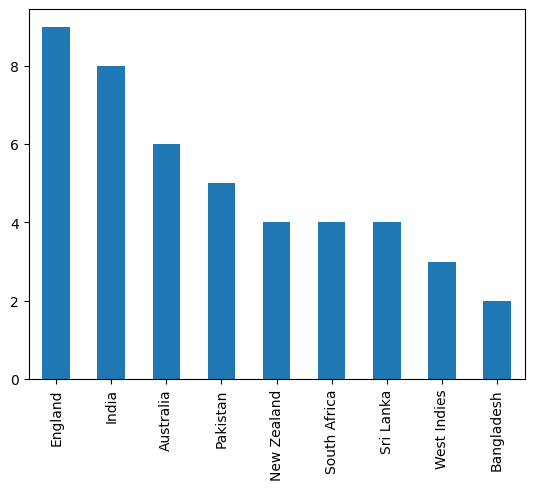

In [24]:
fixture['Result'].value_counts().plot(kind='bar')